## Data Visualization

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("green_tripdata_2015-09.csv")

In [3]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

I'm using Bokeh and Datashader to visualize the pickup and dropoff data. We can pan and zoom in the map and it gives us the independence to look at areas of our interest.

In [ ]:
NYC = x_range, y_range = ((-74.05, -73.7), (40.6, 40.9))  ## selecting the range for the map around NYC

plot_width = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan, wheel_zoom, reset', plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
              x_range=x_range, y_range=y_range, outline_line_color=None,
              min_border=0, min_border_left=0, min_border_right=0,
              min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p

options = dict(line_color=None, fill_color='blue', size=5)

In [5]:
samples = df.sample(n=10000) ## Taking just 10000 samples for this visualization
j = base_plot()

j.circle(x=samples['Pickup_longitude'], y=samples['Pickup_latitude'], **options)
show(j)

Most pickup locations are from Bronx, Brooklyn and Queens and some from Manhattan. 

In [6]:
samples = df.sample(n=10000)
j = base_plot()

j.circle(x=samples['Dropoff_longitude'], y=samples['Dropoff_latitude'], **options)
show(j)

The dropoff location is majorly in Manhattan and Brooklyn as can be predicted given the amount of offices both these places have.

In [7]:
import datashader as ds
from datashader import transfer_functions as tr_fns
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:2]

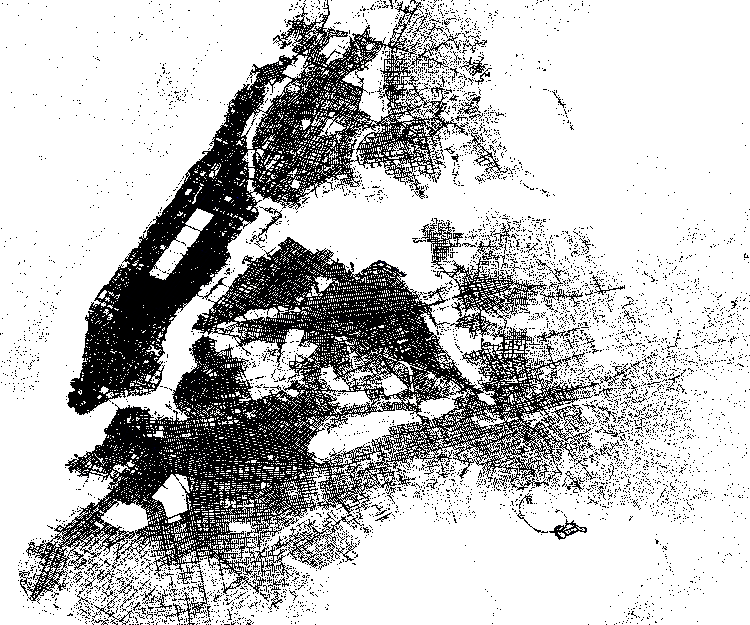

In [8]:
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(df, 'Dropoff_longitude', 'Dropoff_latitude', ds.count('Passenger_count')) ## aggregates the data using passenger count
img = tr_fns.shade(agg, cmap=["black", 'darkblue'], how='linear')
img

The datashader gives a better perspective to the amount of dropoffs as well as pickups in and around the burroughs. Most of the dropoffs are very densely concentrated in Manhattan. Pickups are done from outside Manhattan and majorly from Brooklyn. People working in Manhattan like staying near their offices but Manhattan being such an expensive place isn't home to a large workforce but rather Brooklyn is.

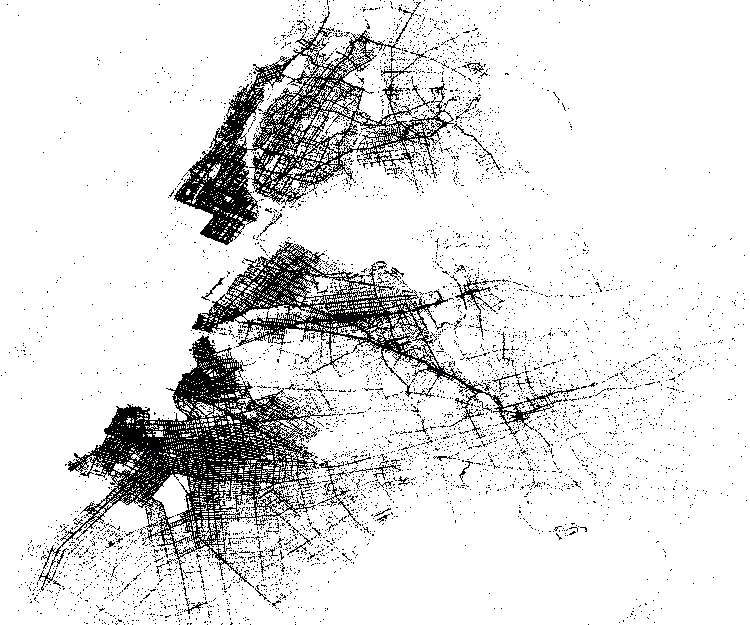

In [9]:
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(df, 'Pickup_longitude', 'Pickup_latitude', ds.count('Passenger_count'))
img = tr_fns.shade(agg, cmap=["black", 'darkblue'], how='linear')
img